In [1]:
import sys
sys.path.append('../')
import pandas as pd
import csv
import matplotlib.pyplot as plt
# import ipywidgets as widgets
from IPython.display import display


In [2]:
from substrates import morph_substrate, control_substrate
from generate_robot import generate_robot
import neat
import dill
from hyperneat.new_hyperNEAT import create_phenotype_network
from hyperneat.substrate import Substrate
from hyperneat.visualize import draw_net
import sgr_main as sgr
from evogym import is_connected, has_actuator, get_full_connectivity, hashable
import evogym.envs
from evogym_sim import simulate_env
from hyperneat.new_hyperNEAT import create_phenotype_network
from substrates import morph_substrate, control_substrate


In [3]:
# base_path = "../results_multiple_neat/"
# base_path = "../results/"
# base_path = "../results_single_neat/"
base_paths = [
    "../results/",
    "../results_multiple_neat/",
    "../results_single_neat/"
]

envs = [
    "Walker-v0",
    "ObstacleTraverser-v1",
    "Climber-v2",
    # "Carrier-v0",
    "Thrower-v0",
]

runs = [
    "run_1",
    "run_2",
    "run_3",
    "run_4",
    "run_5",
] 

STEPS = 600
ROBOT_SIZE = 5
POP = 128

In [4]:
defaultGen = neat.DefaultGenome
params = {"robot_size": ROBOT_SIZE, "steps": STEPS, "pop_size": POP, "robot_substrate": "CPPN"}
f = lambda self, other, config: new_distance(params, morph_substrate(params), generate_robot, self, other, config)
defaultGen.distance = f
neat_config = neat.config.Config(
    defaultGen,
    neat.reproduction.DefaultReproduction, 
    neat.species.DefaultSpeciesSet, 
    neat.stagnation.DefaultStagnation, 
    "../configs/hyperNEAT_config_CPPN_robot"
)

In [5]:
col_names = []

dfs = {e: {p: {r: None for r in runs} for p in base_paths} for e in envs}
pops = {e: {p: {r: None for r in runs} for p in base_paths} for e in envs}
    
for env in envs:
    for path in base_paths:
        for r in runs:
            df_file_name = path + env + "/" + r + "_table.csv"
            try: 
                df = pd.read_csv(df_file_name, sep=';')
            except:
                df = None
            dfs[env][path][r] = df

            pop_file_name = path + env + "/" +r + "_pop.pkl"
            try: 
                with open(pop_file_name, "rb") as file:
                    pops[env][path][r] = dill.load(file)
            except:
                pops[env][path][r] = None

In [6]:
def plot_subgraphs(ax, dfs, runs, gen_range, col, env_name):
    cont = 0
    for path in dfs:
        steps = [i for i in range(gen_range[0], gen_range[1])]
        avg_arr = []
        min_arr = []
        max_arr = []

        for row in steps:
            values = []
            for r in runs:
                if dfs[path][r] is None or len(dfs[path][r][col]) == 0:
                    continue
                max_row = len(dfs[path][r][col])
                if max_row > row:
                    values.append(dfs[path][r][col][row])
                else:
                    values.append(dfs[path][r][col][max_row-1])
            avg_arr.append(sum(values)/len(values))
            min_arr.append(min(values))
            max_arr.append(max(values))
            
        label = "A"
        color = "blue"
        if cont == 0:
            label = "HyperNEAT"
            color = "orange"
        if cont == 1:
            label = "Nested loop NEAT"
            color = "blue"
        if cont == 2:
            label = "Direct encoding NEAT"
            color = "green"
            
        ax.plot(steps, avg_arr, lw =1.3, label=label, color= color)
        ax.fill_between(steps, min_arr,max_arr, alpha = 0.15,  color= color)
        cont += 1
    ax.set_title(env_name)
    ax.set_xlabel("Generations")
    ax.set_ylabel("Fitness")
    # ax.legend(loc="lower right")
    

In [7]:
def get_robot(genome, params, neat_config):
    cppn = neat.nn.FeedForwardNetwork.create(genome, neat_config)

    design_substrate = morph_substrate(params)
    design_net = create_phenotype_network(cppn, design_substrate)

    robot = generate_robot(design_net, params)
    if not sgr.eval_genome_constraint(robot):
        return robot, None
    connections = get_full_connectivity(robot)
    env = evogym.envs.gym.make(params["env"], body=robot, connections=connections)
    img = env.render(mode='img')
    env.close()
    return robot, img

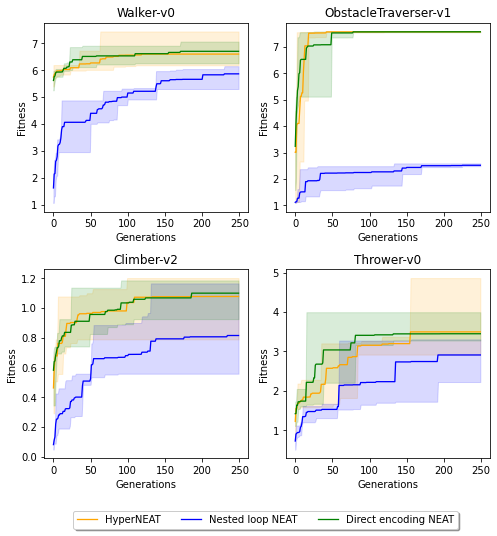

In [14]:
cols = ['pop_size', 'best_fit', 'num_species']



# for e in envs:
#     fig, ax = plt.subplots()
#     plot_subgraphs(ax, dfs[e], runs, [0, 250], "best_fit", e)
#     plt.tight_layout()
    
plt.rcParams['figure.figsize'] = [7, 7]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
plot_subgraphs(ax1, dfs[envs[0]], runs, [0, 250], "best_fit", envs[0])
plot_subgraphs(ax2, dfs[envs[1]], runs, [0, 250], "best_fit", envs[1])
plot_subgraphs(ax3, dfs[envs[2]], runs, [0, 250], "best_fit", envs[2])
plot_subgraphs(ax4, dfs[envs[3]], runs, [0, 250], "best_fit", envs[3])

plt.tight_layout()
plt.legend(loc='lower center', bbox_to_anchor=(-.1, -0.4),
          fancybox=True, shadow=True, ncol=5)
plt.savefig("results.png")




 run_1
!!!!!!!!!!!!!!!!!!!!!!!! Specie  88 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  90 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  86 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  92 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  85 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  89 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  80 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  84 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  91 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  87 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  83 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  67 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  82 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  46 !!!!!!!!!!!!!!!!!!!!!!!!!!!
genome 13492: 3.2339183692547158


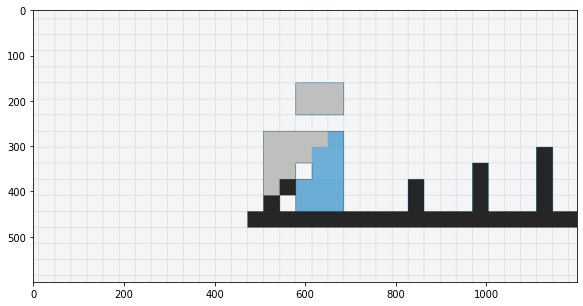



 run_2
!!!!!!!!!!!!!!!!!!!!!!!! Specie  91 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  100 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  99 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  95 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  85 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  90 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  92 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  97 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  87 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  78 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  94 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  89 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  93 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  96 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  82 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Speci

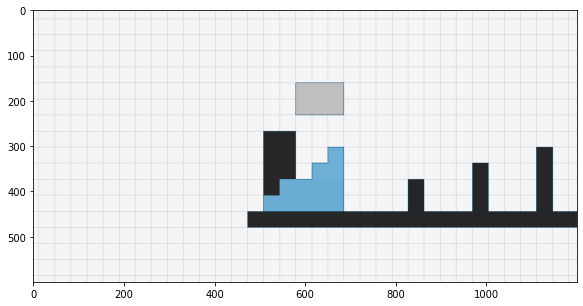

!!!!!!!!!!!!!!!!!!!!!!!! Specie  57 !!!!!!!!!!!!!!!!!!!!!!!!!!!
genome 15930: 4.8657453704667155


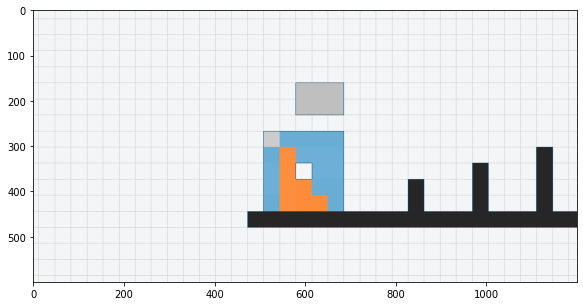



 run_3
!!!!!!!!!!!!!!!!!!!!!!!! Specie  58 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  67 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  73 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  71 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  66 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  72 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  70 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  65 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  62 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  59 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  69 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  63 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  57 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  64 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  51 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie

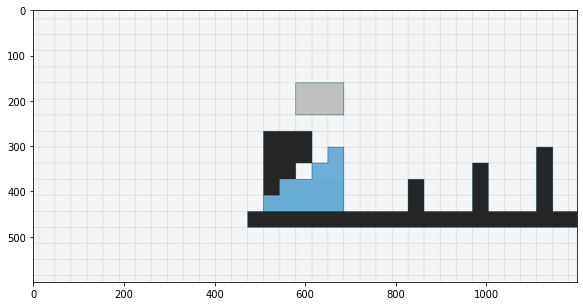

!!!!!!!!!!!!!!!!!!!!!!!! Specie  41 !!!!!!!!!!!!!!!!!!!!!!!!!!!
genome 9419: 3.2659889767710135


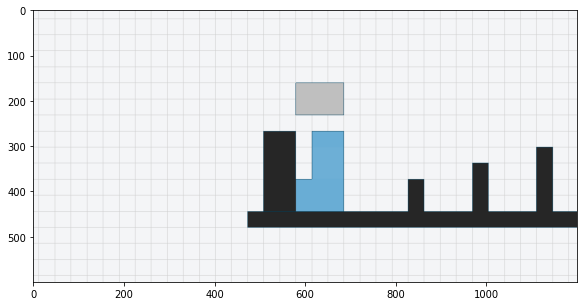



 run_4
!!!!!!!!!!!!!!!!!!!!!!!! Specie  45 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  43 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  48 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  53 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  49 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  30 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  44 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  51 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  32 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  52 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  37 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  33 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  50 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  47 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  46 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie

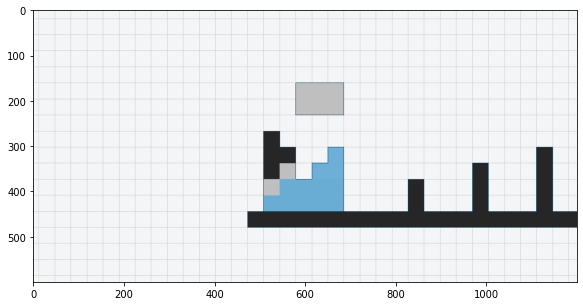



 run_5
!!!!!!!!!!!!!!!!!!!!!!!! Specie  72 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  73 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  82 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  70 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  78 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  74 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  81 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  77 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  67 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  68 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  75 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  71 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  80 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  61 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie  66 !!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!! Specie

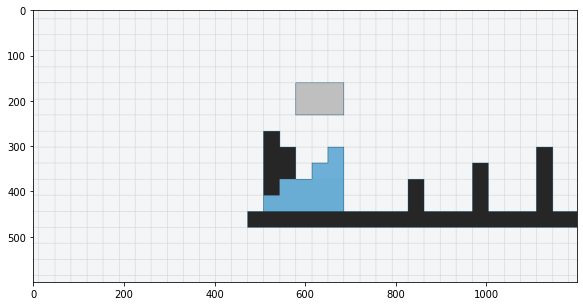

In [11]:
env = envs[3]
params["env"] = env
# for i in pops[env]:
#     print(pops[env][i].best_genome.fitness)

p = base_paths[0]
# for k, v in pops[env][p].items():
#     print(v.best_genome.fitness)
# best_run = max(pops[env][p], key = lambda r: pops[env][p][r].best_genome.fitness)

for r_name in pops[env][p]:
    print("\n\n", r_name)
    pop = pops[env][p][r_name]
    for k, v in pop.species.species.items():
        print("!!!!!!!!!!!!!!!!!!!!!!!! Specie ", k, "!!!!!!!!!!!!!!!!!!!!!!!!!!!")
        c = max(v.members.values(), key = lambda x : x.fitness if x.fitness != None else -1000)
        r, img = get_robot(c, params, neat_config)
        if img is not None and c.fitness > 2:
            print(f"genome {c.key}: {c.fitness}")
            plt.imshow(img)
            plt.show()


In [11]:
g = pop.best_genome
# g = pop.population[24256]
params["save_to"] = "temp"
# sgr.single_genome_fit(g, params, neat_config, False, True)

ValueError: too many values to unpack (expected 2)

In [21]:
cppn = neat.nn.FeedForwardNetwork.create(g, neat_config)
robot = g.robot
controller_substrate = control_substrate(params, robot)

controller_net = create_phenotype_network(cppn, controller_substrate)

_, _, imgs = simulate_env(robot, controller_net, params, False, True)

500


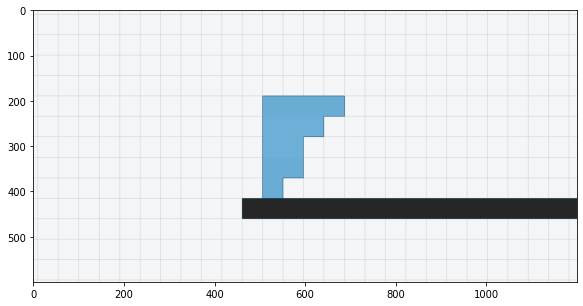

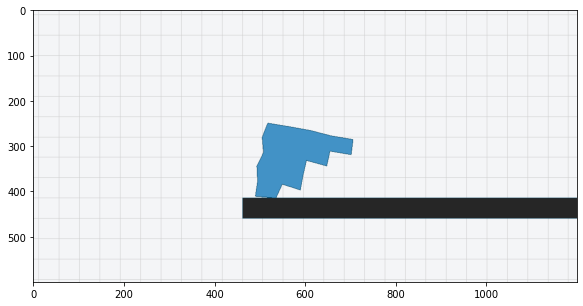

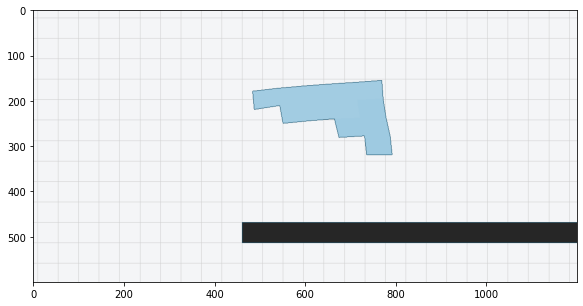

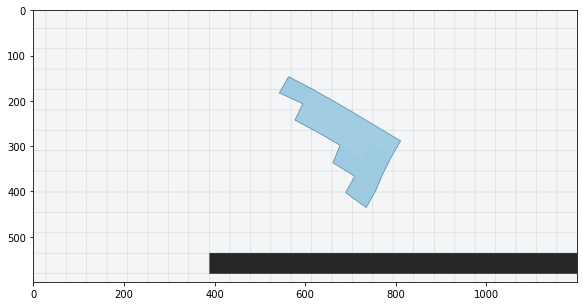

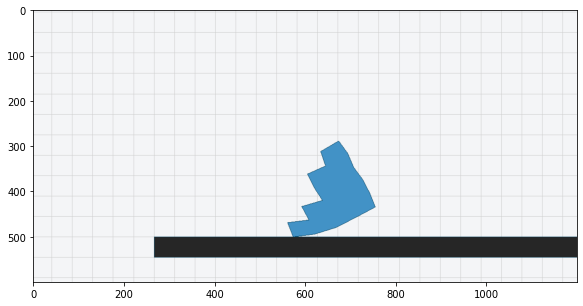

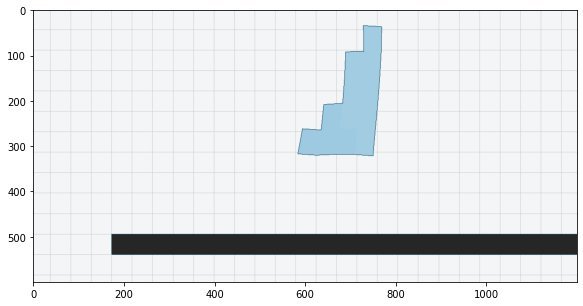

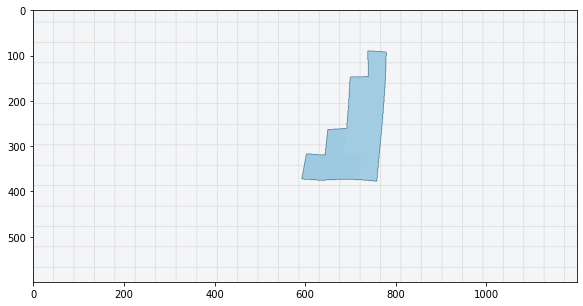

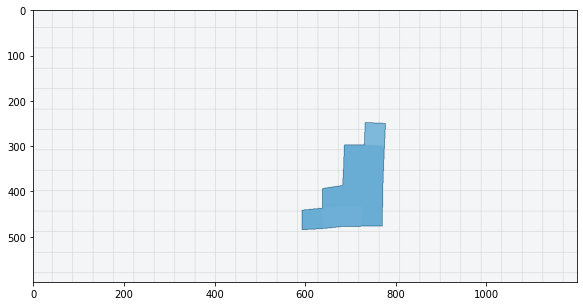

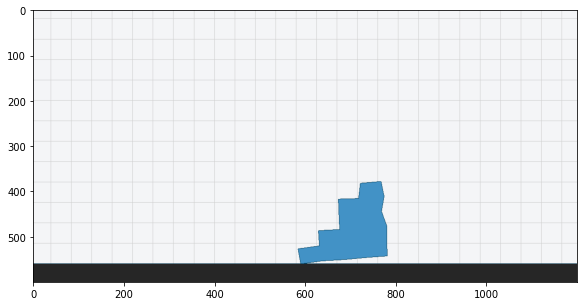

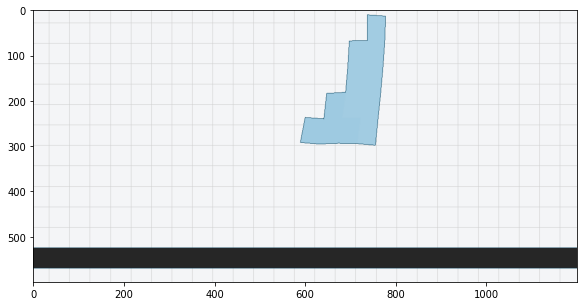

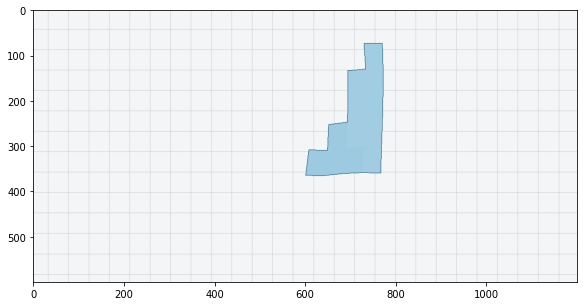

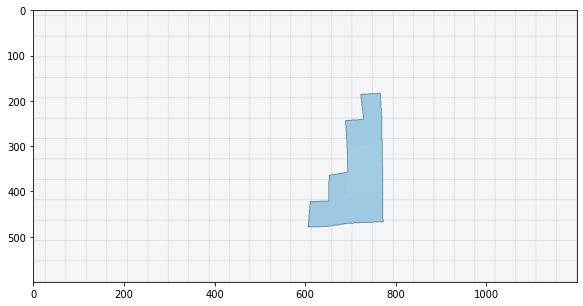

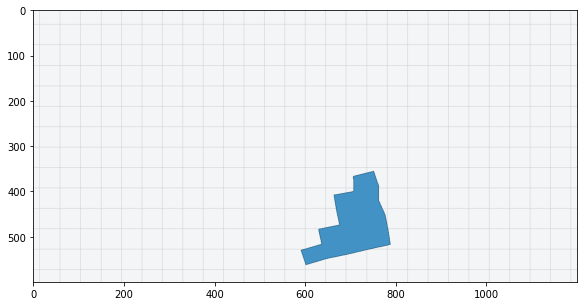

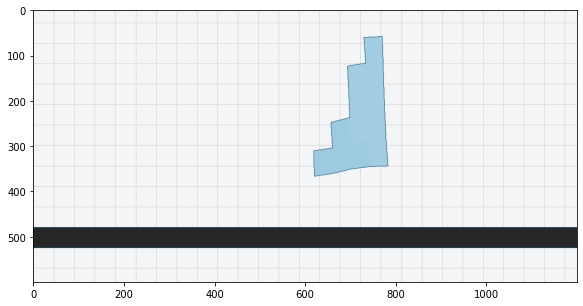

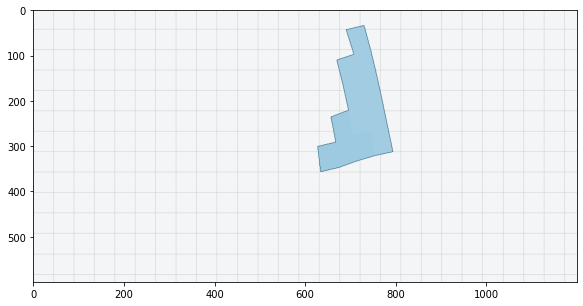

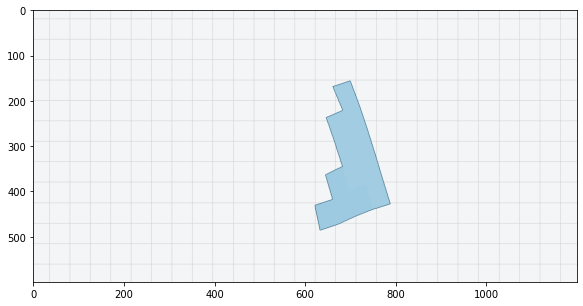

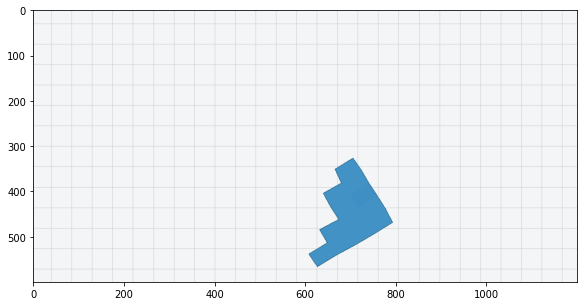

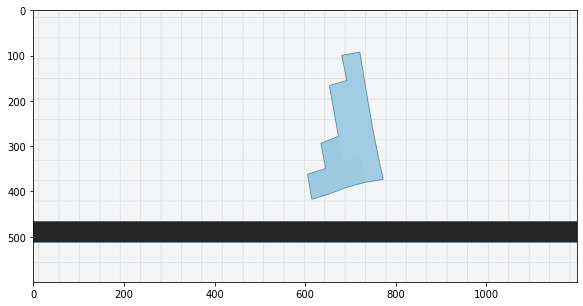

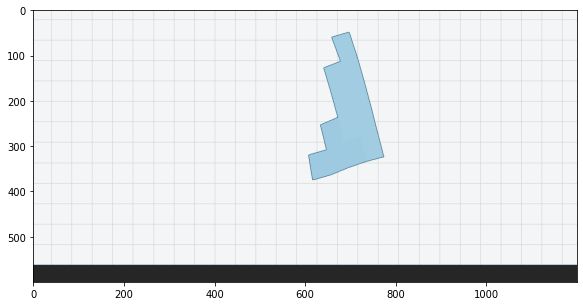

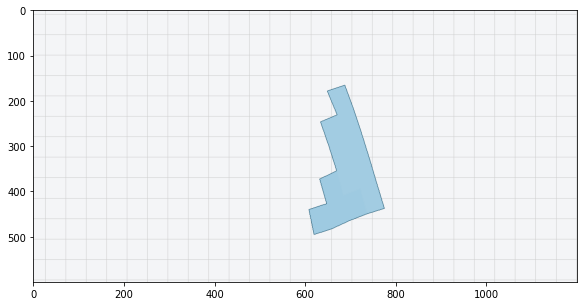

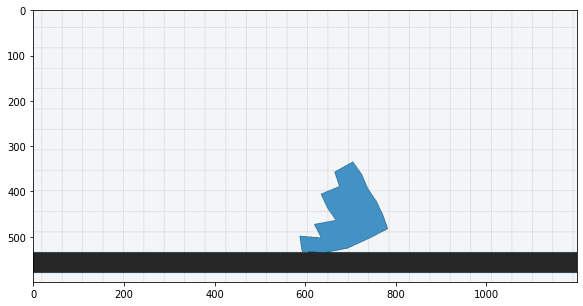

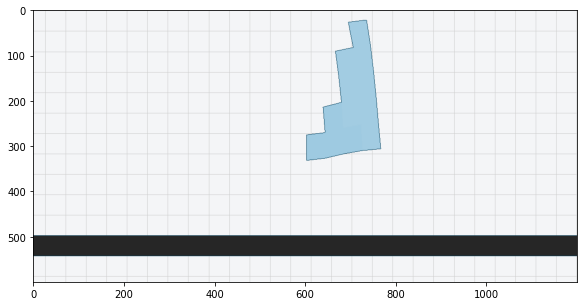

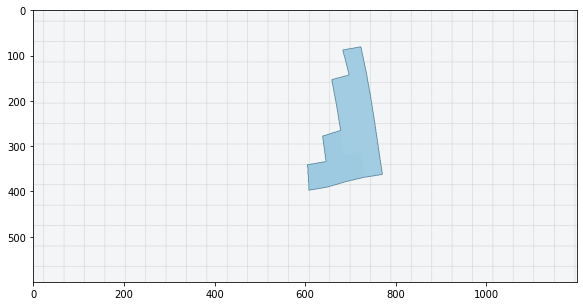

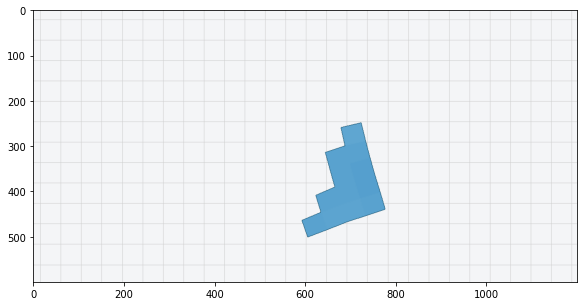

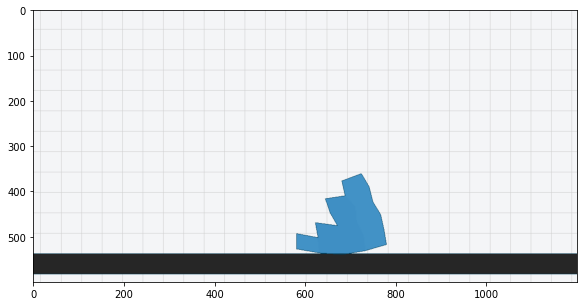

In [25]:
cont = 0
print(len(imgs))
for img in imgs:
    if cont %20 == 0:
        plt.imshow(img)
        plt.show()
    cont += 1